In [ ]:
###### #Following instructions in DataCamp course:
 
#https://campus.datacamp.com/courses/generalized-linear-models-in-python/modeling-binary-data?ex=15
#https://towardsdatascience.com/a-quick-guide-on-descriptive-statistics-using-pandas-and-seaborn-2aadc7395f32
#https://github.com/VIS-SIG/Wonderful-Wednesdays/tree/master/data/2020/2020-12-09


#Import libraries
 
import statsmodels.api as sm #Array based model
 
from statsmodels.formula.api import glm
 
import numpy as np
import matplotlib.pyplot as plt

#from lifelines import KaplanMeierFitter

from sklearn.ensemble import RandomForestClassifier



In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
import os
print(os.getcwd()) #/Users/zahraSari


/content


In [ ]:

cwd=os.chdir('/Users/zahraSari/Desktop/ResidualTumor') 

#Change directory

Files = os.listdir(cwd) 


FileNotFoundError: ignored

In [ ]:
#Data from Github : 
#https://github.com/VIS-SIG/Wonderful-Wednesdays/blob/master/data/2020/2020-12-09/Reexcision.csv    

data= pd.read_csv('Book.csv')

print(data)
 
#age
#tumorsize
#histology (hist; 0: others, 1: Invasive-duct./ductal-lob.)
#Multifocality (mult.foc; 0: no, 1: yes)
#Accomp. in situ (acc.in.situ; 0: others, 1: DCIS and LCIS)
#Lymphovascular invasion (lymph.inv; 0: no, 1: yes)
#Estrogen-receptor (estr.rec; 0: no, 1: yes)
#Progesterone-receptor (prog.rec; 0: no, 1: yes)


     RE  age  tumorsize  hist  multfoc  accinsitu  lymphinv  estrrec  progrec
0     0   54       24.4     0        0          0         0        0        0
1     1   54       27.3     1        0          1         0        1        0
2     1   80       28.7     0        0          1         0        0        0
3     0   41       22.8     1        0          0         0        1        0
4     0   60       31.4     1        0          0         0        0        0
..   ..  ...        ...   ...      ...        ...       ...      ...      ...
495   0   64       27.9     1        1          0         0        0        0
496   0   60        9.3     1        0          1         0        0        0
497   0   53       35.4     1        0          0         1        0        0
498   0   50        4.0     1        0          0         0        1        0
499   1   60       23.5     1        1          1         0        1        1

[500 rows x 9 columns]


In [ ]:

print(data.columns.tolist()) #View the column names
 

['RE', 'age', 'tumorsize', 'hist', 'multfoc', 'accinsitu', 'lymphinv', 'estrrec', 'progrec']


In [ ]:
data.info() # Tumor size has 9 unknown variables
 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RE         500 non-null    int64  
 1   age        500 non-null    int64  
 2   tumorsize  500 non-null    float64
 3   hist       500 non-null    int64  
 4   multfoc    500 non-null    int64  
 5   accinsitu  500 non-null    int64  
 6   lymphinv   500 non-null    int64  
 7   estrrec    500 non-null    int64  
 8   progrec    500 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 35.3 KB


In [ ]:
data.mean()

RE            0.2880
age          56.7440
tumorsize    23.1418
hist          0.5900
multfoc       0.1960
accinsitu     0.2280
lymphinv      0.1800
estrrec       0.2040
progrec       0.2780
dtype: float64

In [ ]:
total_rows=len(data.axes[0])
total_cols=len(data.axes[1])
print("Number of Rows: "+str(total_rows))
print("Number of Columns: "+str(total_cols))

Number of Rows: 500
Number of Columns: 9


In [ ]:

data['tumorsize']= pd.to_numeric(data['tumorsize'])


In [ ]:
data=data.dropna() #Removing the 9 unknown variables from Data Frame
 

In [ ]:
data.mean()

RE            0.2880
age          56.7440
tumorsize    23.1418
hist          0.5900
multfoc       0.1960
accinsitu     0.2280
lymphinv      0.1800
estrrec       0.2040
progrec       0.2780
dtype: float64

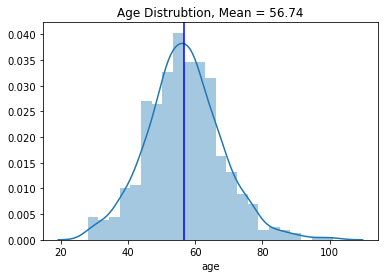

56.744

In [ ]:

# Plot the age variable
sns.distplot(data['age'])

# plt.axvline(np.median(data['age']),color='b', linestyle='--') 

plt.axvline(np.mean(data['age']),color='b', linestyle='-') 

#Display the plot

plt.title('Age Distrubtion, Mean = 56.74')

plt.show()

data.age.mean()

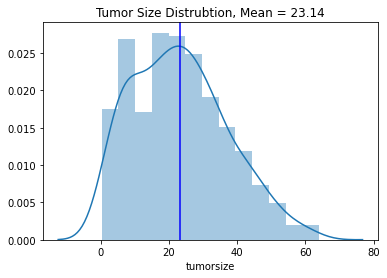

23.1418

In [ ]:

# Plot first variable

sns.distplot(data['tumorsize'])
 
# plt.axvline(np.median(data['tumorsize']),color='b', linestyle='--') 

plt.axvline(np.mean(data['tumorsize']),color='b', linestyle='-') 
    
    
# Display the

plt.title('Tumor Size Distrubtion, Mean = 23.14')

plt.show()

data.tumorsize.mean()


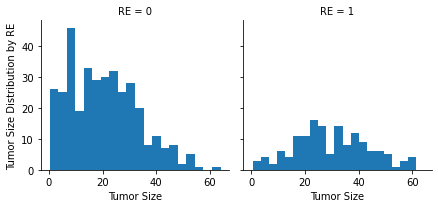

In [ ]:

#Interpretation: People with re-exision 

g = sns.FacetGrid(data, col='RE')

g.map(plt.hist, 'tumorsize', bins=20)


# Adjust title and axis labels directly
g.set_axis_labels(x_var="Tumor Size", y_var="Tumor Size Distribution by RE")


# Clearly ones with RE=1 have smaller tumorsize

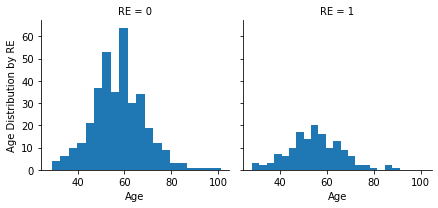

In [ ]:

g = sns.FacetGrid(data, col='RE')
g.map(plt.hist, 'age', bins=20)


# Adjust title and axis labels directly
g.set_axis_labels(x_var="Age", y_var="Age Distribution by RE")

#RE=1 has younger age distribution


# Pivoting Features

In [ ]:
data['hist'].value_counts().sort_values()

0    205
1    295
Name: hist, dtype: int64

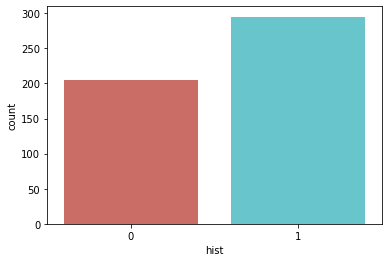

In [ ]:
sns.countplot(x='hist',data=data,palette='hls')
plt.show()

#

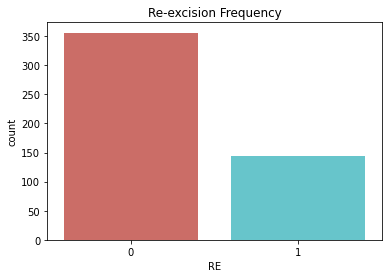

In [ ]:
sns.countplot(x='RE',data=data,palette='hls')
plt.title('Re-excision Frequency')
plt.show()


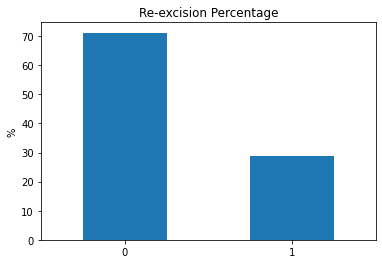

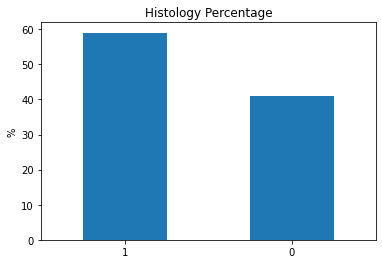

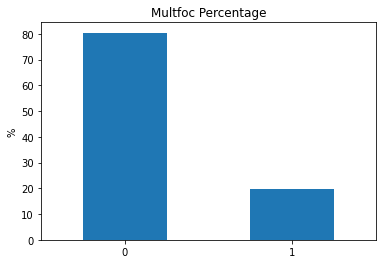

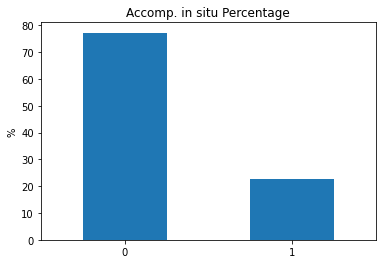

In [ ]:

# Summary Chart Re-excision

ax = ((100 *data["RE"].value_counts() / len(data))).plot.bar(rot=0)
ax.set( ylabel="%", title="Re-excision Percentage")

plt.show()

# Summary Chart hist

ax = ((100 *data["hist"].value_counts() / len(data))).plot.bar(rot=0)
ax.set( ylabel="%", title="Histology Percentage")

plt.show()

# Summary Chart multfoc

ax = ((100 *data["multfoc"].value_counts() / len(data))).plot.bar(rot=0)
ax.set( ylabel="%", title="Multfoc Percentage")

plt.show()


# Summary Chart accinsitu

ax = ((100 *data["accinsitu"].value_counts() / len(data))).plot.bar(rot=0)
ax.set( ylabel="%", title="Accomp. in situ Percentage")

plt.show()


In [ ]:

data.groupby(['RE']).mean() #Mean of variables for RE of 0 or 1


,age,tumorsize,hist,multfoc,accinsitu,lymphinv,estrrec,progrec
RE,,,,,,,,
0,57.404494,20.381461,0.657303,0.168539,0.151685,0.160112,0.210674,0.294944
1,55.111111,29.965972,0.423611,0.263889,0.416667,0.229167,0.187500,0.236111


Text(0, 0.5, 'Age')

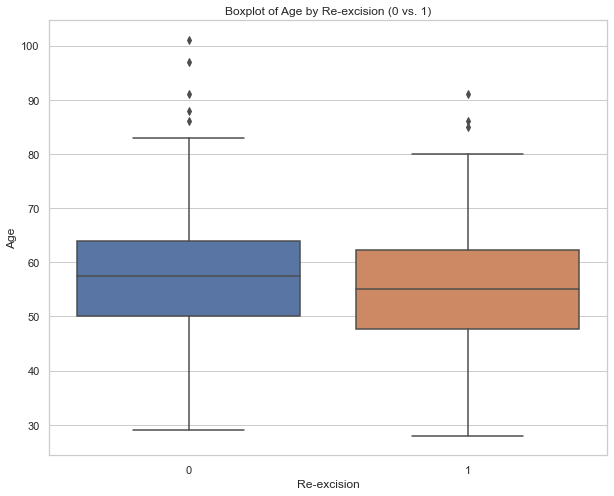

In [ ]:

#Interpretation: Age distribution for patinets who had Re-excision is lower than those with 

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,8))
plt.title('Boxplot of Age by Re-excision (0 vs. 1)')
ax = sns.boxplot( x='RE',y='age', data=data, orient="v")

plt.xlabel('Re-excision')
plt.ylabel('Age')

Text(0, 0.5, 'Tumor Size')

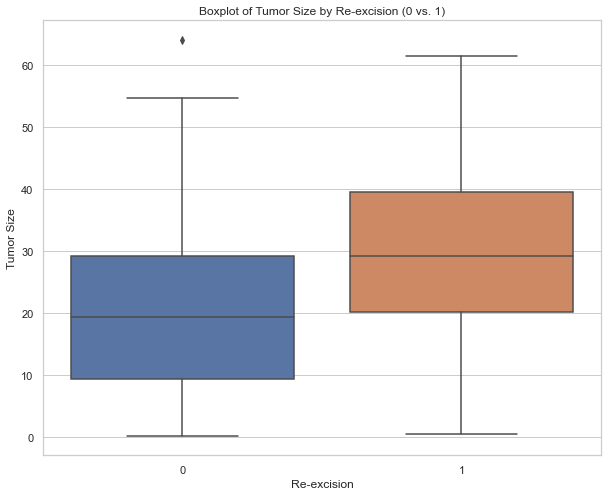

In [ ]:

%matplotlib inline

sns.set(style="whitegrid")

plt.figure(figsize=(10,8))
ax = sns.boxplot(y='tumorsize' , x='RE', data=data, orient="v")

plt.title('Boxplot of Tumor Size by Re-excision (0 vs. 1)')

plt.xlabel('Re-excision')
plt.ylabel('Tumor Size')

#The box plot shows you how a feature's values spread out for each class. 
#It's a compact representation of the distribution, showing the extreme high value, 
#upper quartile, median, lower quartile and extreme low value.



# Correlating categorical features

/Users/zahraSari/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/zahraSari/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/zahraSari/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


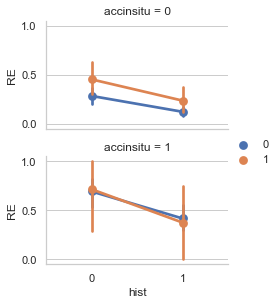

In [ ]:

grid = sns.FacetGrid(data, row='accinsitu', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'hist', 'RE' , 'lymphinv', palette='deep')
grid.add_legend()


In [ ]:
print(data.corr)

<bound method DataFrame.corr of      RE  age  tumorsize  hist  multfoc  accinsitu  lymphinv  estrrec  progrec
0     0   54       24.4     0        0          0         0        0        0
1     1   54       27.3     1        0          1         0        1        0
2     1   80       28.7     0        0          1         0        0        0
3     0   41       22.8     1        0          0         0        1        0
4     0   60       31.4     1        0          0         0        0        0
..   ..  ...        ...   ...      ...        ...       ...      ...      ...
495   0   64       27.9     1        1          0         0        0        0
496   0   60        9.3     1        0          1         0        0        0
497   0   53       35.4     1        0          0         1        0        0
498   0   50        4.0     1        0          0         0        1        0
499   1   60       23.5     1        1          1         0        1        1

[500 rows x 9 columns]>


# Correlation

Text(0.5, 1.0, 'Correlation Plot')

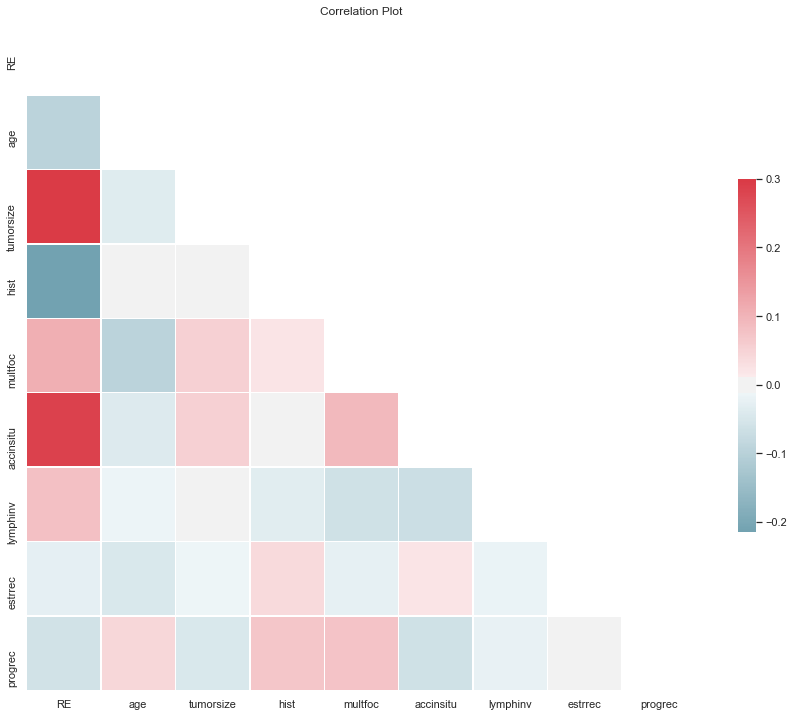

In [ ]:
####Correlation Plot#######

corr=data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Plot')

# Statistical Model - Logistic Model

In [ ]:

#########Statistical Model############

#Fit logistic regression model
#Logistic regression is an improved version of linear regression.


In [ ]:

model = sm.GLM.from_formula("RE ~ hist + age + tumorsize + hist + multfoc + accinsitu + lymphinv + estrrec + progrec ", family = sm.families.Binomial(), data=data)
result = model.fit()
result.summary()

#Based on p-value being less than 0.05, 
#Significant variables are: hist, tumorsize, accinsitu, lymphinv
#Age is very close to 0.05 so speculuative whether it is significant, 
#Similarly for Intercept, p-value is very close to 0.05 but doesn't pass


#Coef for hist: (Thinking of linear regression formula Y = AX + B) 
#where A= -1.2014 , B is 0 since it is non-significant. 
#If a person’s hist is 1 unit more s/he will have a 0.052 (coefficient with age in the table above) unit more 
#chance of having heart disease based on the p-value in the table.

#Generally, positive coefficients indicate that the event becomes more likely as the predictor increases. 
#Negative coefficients indicate that the event becomes less likely as the predictor increases.



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     RE   No. Observations:                  500
Model:                            GLM   Df Residuals:                      491
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.42
Date:                Wed, 13 Jan 2021   Deviance:                       472.85
Time:                        18:28:15   Pearson chi2:                     497.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2132      0.652     -1.861      0.063      -2.491       0.065
hist          -1.2014      0.234     -5.124      0.000      -1.661      -0.742
age           -0.0198      0.010     -1.901      0.057      -0.040       0.001
tumorsize      0.0582      0.009      6.609      0.000       0.041       0.075
multfoc        0.4622      0.276      1.675      0.094      -0.079       1.003
accinsitu      1.5921      0.257      6.186      0.000       1.088       2.097
lymphinv       0.6619      0.285      2.320      0.020       0.103       1.221
estrrec       -0.1542      0.290     -0.532      0.595      -0.723       0.414
progrec       -0.0951      0.260     -0.366      0.715      -0.605       0.415
==============================================================================
"""

In [ ]:
#Removing non-significant variables and re-fitting the model
#Age seems to be significant now

model = sm.GLM.from_formula("RE ~ hist + age + tumorsize + accinsitu + lymphinv  -1 ", family = sm.families.Binomial(), data=data)
result = model.fit()
result.summary()

#coeffiecnt -1.2849 for hist shows increase of odds
#for ones with hist=1 than ones with hist=0

#According to this fitted model, older people are more
#likely to have Reexicision than younger people. The 
#log odds for heart disease increases by 0.0545 units for each year.
#If a person is 10 years older his or her chance of having RE
#increases by 0.0545 * 10 = 0.545 units.


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                     RE   No. Observations:                  500
Model:                            GLM   Df Residuals:                      495
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -239.59
Date:                Wed, 13 Jan 2021   Deviance:                       479.18
Time:                        18:28:15   Pearson chi2:                     506.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
hist          -1.2849      0.228     -5.625      0.000      -1.733      -0.837
age           -0.0374      0.005     -7.851      0.000      -0.047      -0.028
tumorsize      0.0545      0.008      6.485      0.000       0.038       0.071
accinsitu      1.5787      0.255      6.184      0.000       1.078       2.079
lymphinv       0.5854      0.282      2.075      0.038       0.032       1.138
==============================================================================
"""

In [ ]:

data[['RE','hist', 'age' , 'tumorsize' , 'accinsitu' , 'lymphinv']].corr()


,RE,hist,age,tumorsize,accinsitu,lymphinv
RE,1.000000,-0.215161,-0.092567,0.312971,0.286006,0.081392
hist,-0.215161,1.000000,-0.004161,-0.008132,0.007172,-0.032812
age,-0.092567,-0.004161,1.000000,-0.036707,-0.039014,-0.015758
tumorsize,0.312971,-0.008132,-0.036707,1.000000,0.056422,0.006659
accinsitu,0.286006,0.007172,-0.039014,0.056422,1.000000,-0.068494
lymphinv,0.081392,-0.032812,-0.015758,0.006659,-0.068494,1.000000


# Visualization of the Fitted Model

In [ ]:
#https://towardsdatascience.com/logistic-regression-model-fitting-and-finding-the-correlation-p-value-z-score-confidence-8330fb86db19
#With help from this site

In [ ]:
from statsmodels.sandbox.predict_functional import predict_functional

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
values = {"hist": 1, "tumorsize": 23, "accinsitu":0 , "lymphinv" :0 }


In [ ]:
pr, cb, fv = predict_functional(result, "age", values=values, ci_method="simultaneous")


/Users/zahraSari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'progrec', 'estrrec', 'multfoc' in data frame but not in summaries or values.
  ValueWarning)


Text(0.5, 1.0, 'Fitted Model: Log-odds of Re-excision by Age for patients with hist=1, tumorsize=23,accinsitu=0 ,lymphinv=0 ')

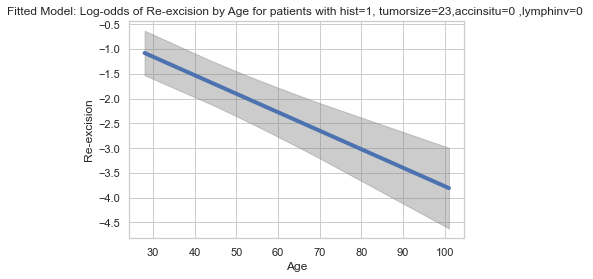

In [ ]:
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
ax.set_ylabel("Re-excision")

ax.set_title('Fitted Model: Log-odds of Re-excision by Age for patients with hist=1, tumorsize=23,accinsitu=0 ,lymphinv=0 ')




#This plot of fitted log-odds  visualizes the effect of age on reexcision for 
#hist=0, tumorsize=23, accinsitu=0 and lumphinv=0 by the glm fitted model
#Slight negative correlation of age and RE are visible in this plot
#For the specific described variables

/Users/zahraSari/opt/anaconda3/lib/python3.7/site-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'progrec', 'estrrec', 'multfoc' in data frame but not in summaries or values.
  ValueWarning)


Text(0.5, 1.0, 'Fitted Model: Log-odds of Re-excision by Tumorsize for patients with hist=1,age=57,accinsitu=0,lymphinv=0')

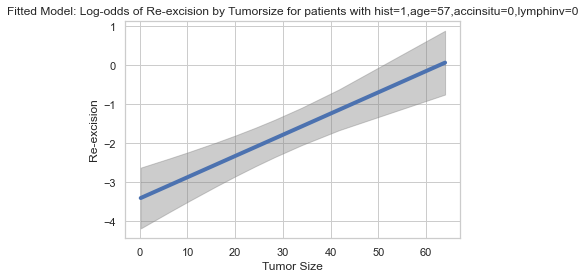

In [ ]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"hist": 1, "age": 57, "accinsitu":0 , "lymphinv" :0 }
pr, cb, fv = predict_functional(result, "tumorsize", values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Tumor Size")
ax.set_ylabel("Re-excision")

ax.set_title('Fitted Model: Log-odds of Re-excision by Tumorsize for patients with hist=1,age=57,accinsitu=0,lymphinv=0')

#This plot of fitted log-odds  visualizes the effect of tumorsize on reexcision for 
#hist=0, age=45, accinsitu=0 and lumphinv=0 by the glm fitted model
#Clear Positive correlation of tumorsize and RE are visible in this plot


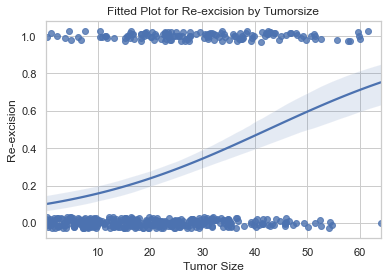

In [ ]:

import seaborn as sns
 
#Plot the relationship between two variables in a DataFrame and 
#add overlay with the logistic fit


sns.regplot(x = 'tumorsize', y = 'RE',
            y_jitter = 0.03,
            data = data,
            logistic = True,
            ci = 95)

plt.title('Fitted Plot for Re-excision by Tumorsize')


plt.xlabel('Tumor Size')

plt.ylabel('Re-excision')



# Display the plot

plt.show()

#Interpretation: the lower tumor sizes are associated with value 0 for Reexcision, 
#higher values of tumorsize.
#Tumor sizes of over 55 are associated with value of 1 for Reexicision.
#The confidence interval gets wider as the value of the predictor increases. The 
#wide interval is partly due to the small amount of data for larger tumor size.

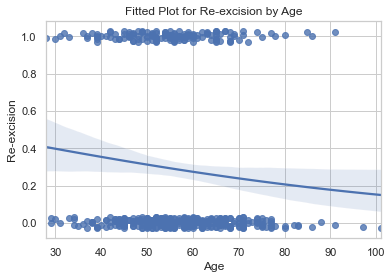

In [ ]:
#Plot the relationship between two variables in a DataFrame and add overlay with the logistic fit

sns.regplot(x = 'age', y = 'RE',
            y_jitter = 0.03,
            data = data,
            logistic = True,
            ci = 95)
 

plt.title('Fitted Plot for Re-excision by Age')
    
plt.xlabel('Age')

plt.ylabel('Re-excision')

# Display the plot
plt.show()

#Interpretation: the lower values age is associated with value 0 for Reexcision, higher values of tumorsize
#eg. tumor size of over 55 are associated with value of 1 for Reexicision.
#The confidence interval gets wider as the value of the predictor increases. The 
#wide interval is partly due to the small amount of data for larger lower and higher ages.



In [ ]:
# Examine the first 5 computed predictions
print(data[['RE',  'hist', 'multfoc', 'accinsitu', 'lymphinv', 'estrrec', 'progrec']].head())



   RE  hist  multfoc  accinsitu  lymphinv  estrrec  progrec
0   0     0        0          0         0        0        0
1   1     1        0          1         0        1        0
2   1     0        0          1         0        0        0
3   0     1        0          0         0        1        0
4   0     1        0          0         0        0        0


In [ ]:
 
# Define the cutoff
cutoff = 0.5
 
# Compute class predictions: y_prediction
y_prediction = np.where(prediction > cutoff, 1, 0)


NameError: name 'prediction' is not defined

# Machine Learning

In [ ]:
#Random Forest

In [ ]:

from sklearn.model_selection import train_test_split


In [ ]:

y=data['RE']


In [ ]:

train_df = data.drop(['RE'], axis=1)


In [ ]:
import numpy as np

from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X
list(y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test


In [ ]:

#print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

#train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
#test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
#combine = [train_df, test_df]

#"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape


In [ ]:

train_df = data.drop(['RE'], axis=1)


In [ ]:
df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

len(test)
len(train)


In [ ]:
#####################DATACAMP#################

# Import train_test_split function
#from sklearn.model_selection import train_test_split

#X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
#y=data['species']  # Labels

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test




# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['age' , 'tumorsize' , 'hist',  'multfoc' , 'accinsitu',  'lymphinv',  'estrrec' , 'progrec']]  # Features
y=data['RE']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test




In [ ]:


#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)



In [ ]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



In [ ]:

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

